In [1]:
import os
os.getcwd()

'C:\\Users\\SHAFIYABI\\Desktop\\remote int2020'

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [48]:
df_use=pd.read_csv('flights.csv')
df=df_use.sample(n=200000).copy()
del df_use

C:\Users\SHAFIYABI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4084455,2015,9,11,5,DL,2569,N991AT,MIA,LGA,1540,...,1817.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3296602,2015,7,25,6,EV,5667,N14204,IAH,DFW,1015,...,1125.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1551821,2015,4,10,5,WN,639,N8656B,SMF,LAX,700,...,817.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1008812,2015,3,7,6,EV,4591,N11191,IAH,CLE,1930,...,2255.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3031375,2015,7,9,4,DL,2220,N3771K,LAX,ATL,1615,...,2328.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.groupby('DEPARTURE_DELAY').size()

DEPARTURE_DELAY
-37.0      1
-35.0      3
-34.0      2
-32.0      1
-31.0      2
          ..
 1257.0    1
 1340.0    1
 1345.0    1
 1457.0    1
 1670.0    1
Length: 623, dtype: int64

In [51]:
df=df.loc[~df.CANCELLED.isin([1])]

In [52]:
df['OUTPUT_LABEL']=(df.DEPARTURE_DELAY>=0).astype(int)

In [53]:
def cal_prevalence(y_actual):
    return(sum(y_actual)/len(y_actual))

In [54]:
print('Prevalence:%.3f'%cal_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.427


In [55]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,OUTPUT_LABEL
4084455,2015,9,11,5,DL,2569,N991AT,MIA,LGA,1540,...,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3296602,2015,7,25,6,EV,5667,N14204,IAH,DFW,1015,...,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1551821,2015,4,10,5,WN,639,N8656B,SMF,LAX,700,...,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1008812,2015,3,7,6,EV,4591,N11191,IAH,CLE,1930,...,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3031375,2015,7,9,4,DL,2220,N3771K,LAX,ATL,1615,...,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [56]:
df.OUTPUT_LABEL.value_counts()

0    169179
1    126233
Name: OUTPUT_LABEL, dtype: int64

In [57]:
df_airports=pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [58]:
df.loc[~df.ORIGIN_AIRPORT.isin(df_airports.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHERS'
df.loc[~df.DESTINATION_AIRPORT.isin(df_airports.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHERS'

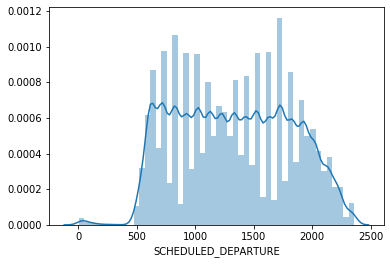

In [59]:
import seaborn as sns
sns.distplot(df['SCHEDULED_DEPARTURE'])

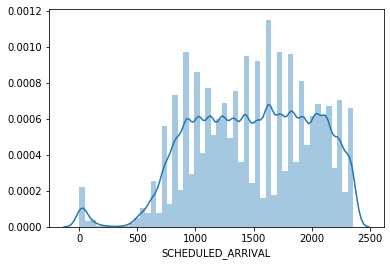

In [60]:
sns.distplot(df['SCHEDULED_ARRIVAL'])

In [61]:
df.drop(columns=['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR',  'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME'])

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,OUTPUT_LABEL
4084455,9,11,5,DL,MIA,LGA,1540,1537.0,-3.0,181.0,160.0,1096,1841,1817.0,-24.0,0,0
3296602,7,25,6,EV,IAH,DFW,1015,1014.0,-1.0,75.0,71.0,224,1130,1125.0,-5.0,0,0
1551821,4,10,5,WN,SMF,LAX,700,658.0,-2.0,85.0,79.0,373,825,817.0,-8.0,0,0
1008812,3,7,6,EV,IAH,CLE,1930,1923.0,-7.0,169.0,152.0,1091,2319,2255.0,-24.0,0,0
3031375,7,9,4,DL,LAX,ATL,1615,1615.0,0.0,265.0,253.0,1947,2340,2328.0,-12.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145799,7,16,4,B6,BOS,PHL,1210,1204.0,-6.0,94.0,94.0,280,1344,1338.0,-6.0,0,0
2784636,6,24,3,DL,SHV,ATL,1712,1955.0,163.0,107.0,111.0,551,1959,2246.0,167.0,0,1
2577551,6,12,5,WN,DEN,SLC,1150,1256.0,66.0,80.0,88.0,391,1310,1424.0,74.0,0,1
1127648,3,15,7,AA,JFK,CLT,820,816.0,-4.0,134.0,122.0,541,1034,1018.0,-16.0,0,0


In [62]:
col_num=['SCHEDULED_DEPARTURE','SCHEDULED_TIME','DISTANCE','SCHEDULED_ARRIVAL','MONTH','DAY','DAY_OF_WEEK']
col_num
out_col=['OUTPUT_LABEL']


In [63]:
df[col_num].isnull().sum()

SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
dtype: int64

In [64]:
col_cat=['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

In [65]:
df[col_cat].isnull().sum()

AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
dtype: int64

In [66]:
df[col_cat].nunique()

AIRLINE                 14
ORIGIN_AIRPORT         323
DESTINATION_AIRPORT    323
dtype: int64

In [67]:
df_cat=pd.get_dummies(df[col_cat],drop_first=True)
df_cat.head()

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
4084455,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3296602,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3031375,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df=pd.concat([df,df_cat],axis=1)

In [69]:
cols_all_cat=list(df_cat.columns)
print('No of categroical columns:',len(cols_all_cat))

No of categroical columns: 657


In [70]:
col_input=col_num+cols_all_cat
df_data=df[col_input+['OUTPUT_LABEL']]
df_data.head()

,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,MONTH,DAY,DAY_OF_WEEK,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,...,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,OUTPUT_LABEL
4084455,1540,181.0,1096,1841,9,11,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3296602,1015,75.0,224,1130,7,25,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551821,700,85.0,373,825,4,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008812,1930,169.0,1091,2319,3,7,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3031375,1615,265.0,1947,2340,7,9,4,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df_data=df_data.sample(n=len(df_data))
df_data=df_data.reset_index(drop=True)

In [72]:
df_valid_test=df_data.sample(frac=0.30)
df_test=df_valid_test.sample(frac=0.5)
df_valid=df_valid_test.drop(df_test.index)

In [73]:
df_train_all=df_data.drop(df_valid.index)

In [74]:
rowpos=(df_train_all.OUTPUT_LABEL==1)
df_train_pos=df_train_all.loc[rowpos]
df_train_neg=df_train_all.loc[~rowpos]
df_train=pd.concat([df_train_pos,df_train_neg.sample(n=len(df_train_pos))],axis=0)
df_train=df_train.sample(n=len(df_train)).reset_index(drop=True)
print('Train balanced prevalence n= %d:%.3f'%(len(df_train),cal_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence n= 214692:0.500


In [75]:
x_train=df_train[col_input].values
x_train_all=df_train_all[col_input].values
x_valid=df_valid[col_input].values
y_train=df_train['OUTPUT_LABEL'].values
y_valid=df_valid['OUTPUT_LABEL'].values
print('Training All shapes :',x_train_all.shape)
print('Training shapes :',x_train.shape,y_train.shape)
print('Validation shapes :',x_valid.shape,y_valid.shape)

Training All shapes : (251100, 664)
Training shapes : (214692, 664) (214692,)
Validation shapes : (44312, 664) (44312,)


In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
import pickle
scalerfile='scaler.sav'
pickle.dump(scaler,open(scalerfile,'wb'))

In [78]:
scaler=pickle.load(open(scalerfile,'rb'))

In [79]:
x_train_tf=scaler.transform(x_train)
x_valid_tf=scaler.transform(x_valid)

In [80]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score
def cal_specificity(y_actual,y_pred,thresh):
    return sum((y_pred<thresh)&(y_actual==0))/sum(y_actual==0)
def print_report(y_actual,y_pred,thresh):
    auc=roc_auc_score(y_actual,y_pred)
    accuracy=accuracy_score(y_actual,(y_pred>thresh))
    precision=precision_score(y_actual,(y_pred>thresh))
    #specify=specify_score(y_actual,(y_pred>thresh))
    recall=recall_score(y_actual,y_pred,thresh)
    print('auc:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('precision:%.3f'%precision)
    #print('specify:%.3f'%specify)
    print('recall:%.3f'%recall)
    print('prevalence:%.3f'%cal_prevalence(y_actual))
    print(' ')
    return auc,accuracy,recall,precision

In [81]:
thresh=0.5

In [83]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr_cls=lr.fit(x_train_tf,y_train)
lr_acc = cross_val_score(lr, x_train_tf, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_tf, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]



In [85]:
lr_y_test =lr_cls.predict(x_valid_tf)
lr_y_test

array([1, 0, 1, ..., 0, 0, 0])

In [86]:
lr_y_train = lr_cls.predict(x_train_tf)
lr_y_train

array([1, 1, 0, ..., 0, 1, 0])

In [87]:
cal_specificity(y_valid,lr_y_test,thresh)

0.6113274336283185

In [89]:
print_report(y_valid,lr_y_test,thresh)

auc:0.614
accuracy:0.614
precision:0.541
recall:0.618
prevalence:0.426
 


(0.6144740096081446,
 0.6140097490521755,
 0.6176205855879706,
 0.5413746693275165)